## Generate E-distance vs MSE plots

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mpl_sizes
import seaborn as sns

formatter = mpl_sizes.get_format("NeurIPS") # options: ICLR, ICML, NeurIPS, InfThesis

In [3]:
e_dist_df = pd.read_csv('../preprocessing/etest_results_single_perts.csv')
e_dist_df

,Unnamed: 0,edist,pvalue,significant,pvalue_adj,significant_adj
0,AHR,21.757839,0.0001,True,0.008464,True
1,ARRDC3,6.931206,0.0001,True,0.008464,True
2,ATL1,60.535701,0.0001,True,0.008464,True
3,BAK1,0.994366,0.0104,True,0.030877,True
4,BCL2L11,0.082736,0.2923,False,0.499161,False
...,...,...,...,...,...,...
80,ZBTB1,27.508356,0.0001,True,0.008464,True
81,ZBTB25,13.570649,0.0001,True,0.008464,True
82,ZC3HAV1,3.710965,0.0001,True,0.008464,True
83,ZNF318,2.619759,0.0001,True,0.008464,True


In [4]:
e_dist_df = e_dist_df.rename(columns={'Unnamed: 0': 'perturbation'})

In [5]:
pert_level_scbert_results = pd.read_csv('individual_results/pert_level_scbert_non_adj_full.csv')
pert_level_scgpt_results = pd.read_csv('individual_results/pert_level_scgpt_non_adj_full.csv')
pert_level_scfoundation_results = pd.read_csv('individual_results/pert_level_scfoundation_non_adj_full.csv')
pert_level_gf_results = pd.read_csv('individual_results/pert_level_gf_non_adj_full.csv')
pert_level_uce_results = pd.read_csv('individual_results/pert_level_uce_non_adj_full.csv')
# combine all the dfs 
pert_level_results = pd.concat([pert_level_gf_results, pert_level_scbert_results, pert_level_uce_results, pert_level_scgpt_results, pert_level_scfoundation_results])
pert_level_results = pert_level_results.rename(columns={'data.eval_pert': 'perturbation'})
pert_level_results

,Name,End Time,Runtime,Tags,test/mse,test/adjusted_mse,de_test/mse,test/num_de_genes,perturbation,data.split,...,trainer.default_root_dir,trainer.deterministic,trainer.devices,trainer.inference_mode,trainer.max_epochs,trainer.min_epochs,trainer.num_sanity_val_steps,de_test/baseline_mse,epoch,trainer/global_step
0,floral-pine-3581,2024-09-16T22:00:30.000Z,40,"IKZF3, eval, geneformer, norman, replicate_1, ...",1.510103,NaN,NaN,NaN,IKZF3,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ethereal-sponge-3584,2024-09-16T22:01:07.000Z,32,"CEBPE, eval, geneformer, norman, replicate_2, ...",1.085474,NaN,NaN,NaN,CEBPE,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,clean-brook-3579,2024-09-16T22:00:24.000Z,34,"CEBPA, eval, geneformer, norman, replicate_0, ...",1.009200,NaN,NaN,NaN,CEBPA,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,royal-dawn-3582,2024-09-16T22:00:24.000Z,34,"SLC4A1, eval, geneformer, norman, replicate_0,...",0.774525,NaN,NaN,NaN,SLC4A1,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,treasured-sun-3574,2024-09-16T21:59:34.000Z,33,"COL1A1, eval, geneformer, norman, replicate_1,...",0.720448,NaN,NaN,NaN,COL1A1,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,distinctive-sea-3045,2024-09-16T19:56:31.000Z,98,"FOXA1, eval, norman, replicate_1, scfoundation...",0.317194,NaN,NaN,NaN,FOXA1,0.0,...,${paths.output_dir},False,1.0,True,20.0,1.0,0.0,NaN,0.0,0.0
193,faithful-hill-3020,2024-09-16T19:41:49.000Z,93,"SET, eval, norman, replicate_0, scfoundation, ...",0.282188,NaN,NaN,NaN,SET,0.0,...,${paths.output_dir},False,1.0,True,20.0,1.0,0.0,NaN,0.0,0.0
194,icy-sun-3007,2024-09-16T19:33:45.000Z,82,"CITED1, eval, norman, replicate_0, scfoundatio...",NaN,NaN,NaN,NaN,CITED1,0.0,...,${paths.output_dir},False,1.0,True,20.0,1.0,0.0,NaN,NaN,NaN
195,rose-butterfly-3018,2024-09-16T19:41:37.000Z,91,"PTPN1, eval, norman, replicate_0, scfoundation...",0.449469,NaN,NaN,NaN,PTPN1,0.0,...,${paths.output_dir},False,1.0,True,20.0,1.0,0.0,NaN,0.0,0.0


In [6]:
pert_level_results = pert_level_results[['test/mse', 'data.fm', 'data.split', 'perturbation']]
pert_level_results = pert_level_results[pert_level_results['test/mse'].notna()]
pert_level_results_grouped = pert_level_results.groupby(['test/mse', 'data.fm', 'perturbation', 'data.split']).mean().reset_index()
pert_level_results_grouped

,test/mse,data.fm,perturbation,data.split
0,0.248993,scgpt,BAK1,0.2
1,0.249096,uce,BAK1,0.2
2,0.249169,geneformer,BAK1,0.2
3,0.249172,scbert,BAK1,0.2
4,0.250618,scfoundation,BAK1,0.2
...,...,...,...,...
702,1.085474,geneformer,CEBPE,0.7
703,1.133057,scgpt,CEBPE,0.7
704,1.140519,uce,CEBPE,0.7
705,1.161822,scfoundation,CEBPE,0.7


In [18]:
# get only the results for perturbation == CEBPE
pert_level_results_grouped = pert_level_results_grouped[pert_level_results_grouped['perturbation'] == 'CEBPE']
pert_level_results_grouped

,test/mse,data.fm,perturbation,data.split
402,0.469909,scbert,CEBPE,0.1
403,0.470515,scgpt,CEBPE,0.1
404,0.470616,uce,CEBPE,0.1
405,0.470810,geneformer,CEBPE,0.1
488,0.511852,scfoundation,CEBPE,0.1
599,0.576401,scfoundation,CEBPE,0.3
604,0.580807,scfoundation,CEBPE,0.4
616,0.586629,scbert,CEBPE,0.3
617,0.586680,geneformer,CEBPE,0.3
618,0.587008,uce,CEBPE,0.3


In [7]:
# Select relevant columns
pert_level_results = pert_level_results[['test/mse', 'perturbation', 'data.split']]

# Group by 'perturbation' and calculate the mean of 'test/mse'
average_mse_per_perturbation = pert_level_results.groupby(['perturbation', 'data.split'])['test/mse'].mean().reset_index()

# Rename the column for clarity
average_mse_per_perturbation = average_mse_per_perturbation.rename(columns={'test/mse': 'average_test_mse'})

# Display the result
average_mse_per_perturbation

,perturbation,data.split,average_test_mse
0,AHR,0.0,0.278863
1,AHR,0.7,0.538213
2,BAK1,0.0,0.261765
3,BAK1,0.2,0.249409
4,BCORL1,0.0,0.377546
...,...,...,...
136,ZBTB1,0.1,0.571769
137,ZBTB25,0.4,0.537704
138,ZC3HAV1,0.0,0.471049
139,ZC3HAV1,0.3,0.484438


In [8]:
merged_df = pd.merge(e_dist_df, average_mse_per_perturbation, on='perturbation')
merged_df

,perturbation,edist,pvalue,significant,pvalue_adj,significant_adj,data.split,average_test_mse
0,AHR,21.757839,0.0001,True,0.008464,True,0.0,0.278863
1,AHR,21.757839,0.0001,True,0.008464,True,0.7,0.538213
2,BAK1,0.994366,0.0104,True,0.030877,True,0.0,0.261765
3,BAK1,0.994366,0.0104,True,0.030877,True,0.2,0.249409
4,BCORL1,3.683320,0.0001,True,0.008464,True,0.0,0.377546
...,...,...,...,...,...,...,...,...
136,ZBTB1,27.508356,0.0001,True,0.008464,True,0.1,0.571769
137,ZBTB25,13.570649,0.0001,True,0.008464,True,0.4,0.537704
138,ZC3HAV1,3.710965,0.0001,True,0.008464,True,0.0,0.471049
139,ZC3HAV1,3.710965,0.0001,True,0.008464,True,0.3,0.484438


In [9]:
merged_df_split = merged_df.groupby('data.split')['average_test_mse'].mean().reset_index()
merged_df_split

,data.split,average_test_mse
0,0.0,0.401602
1,0.1,0.469841
2,0.2,0.466701
3,0.3,0.474926
4,0.4,0.479491
5,0.5,0.483938
6,0.6,0.485662
7,0.7,0.693514


/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


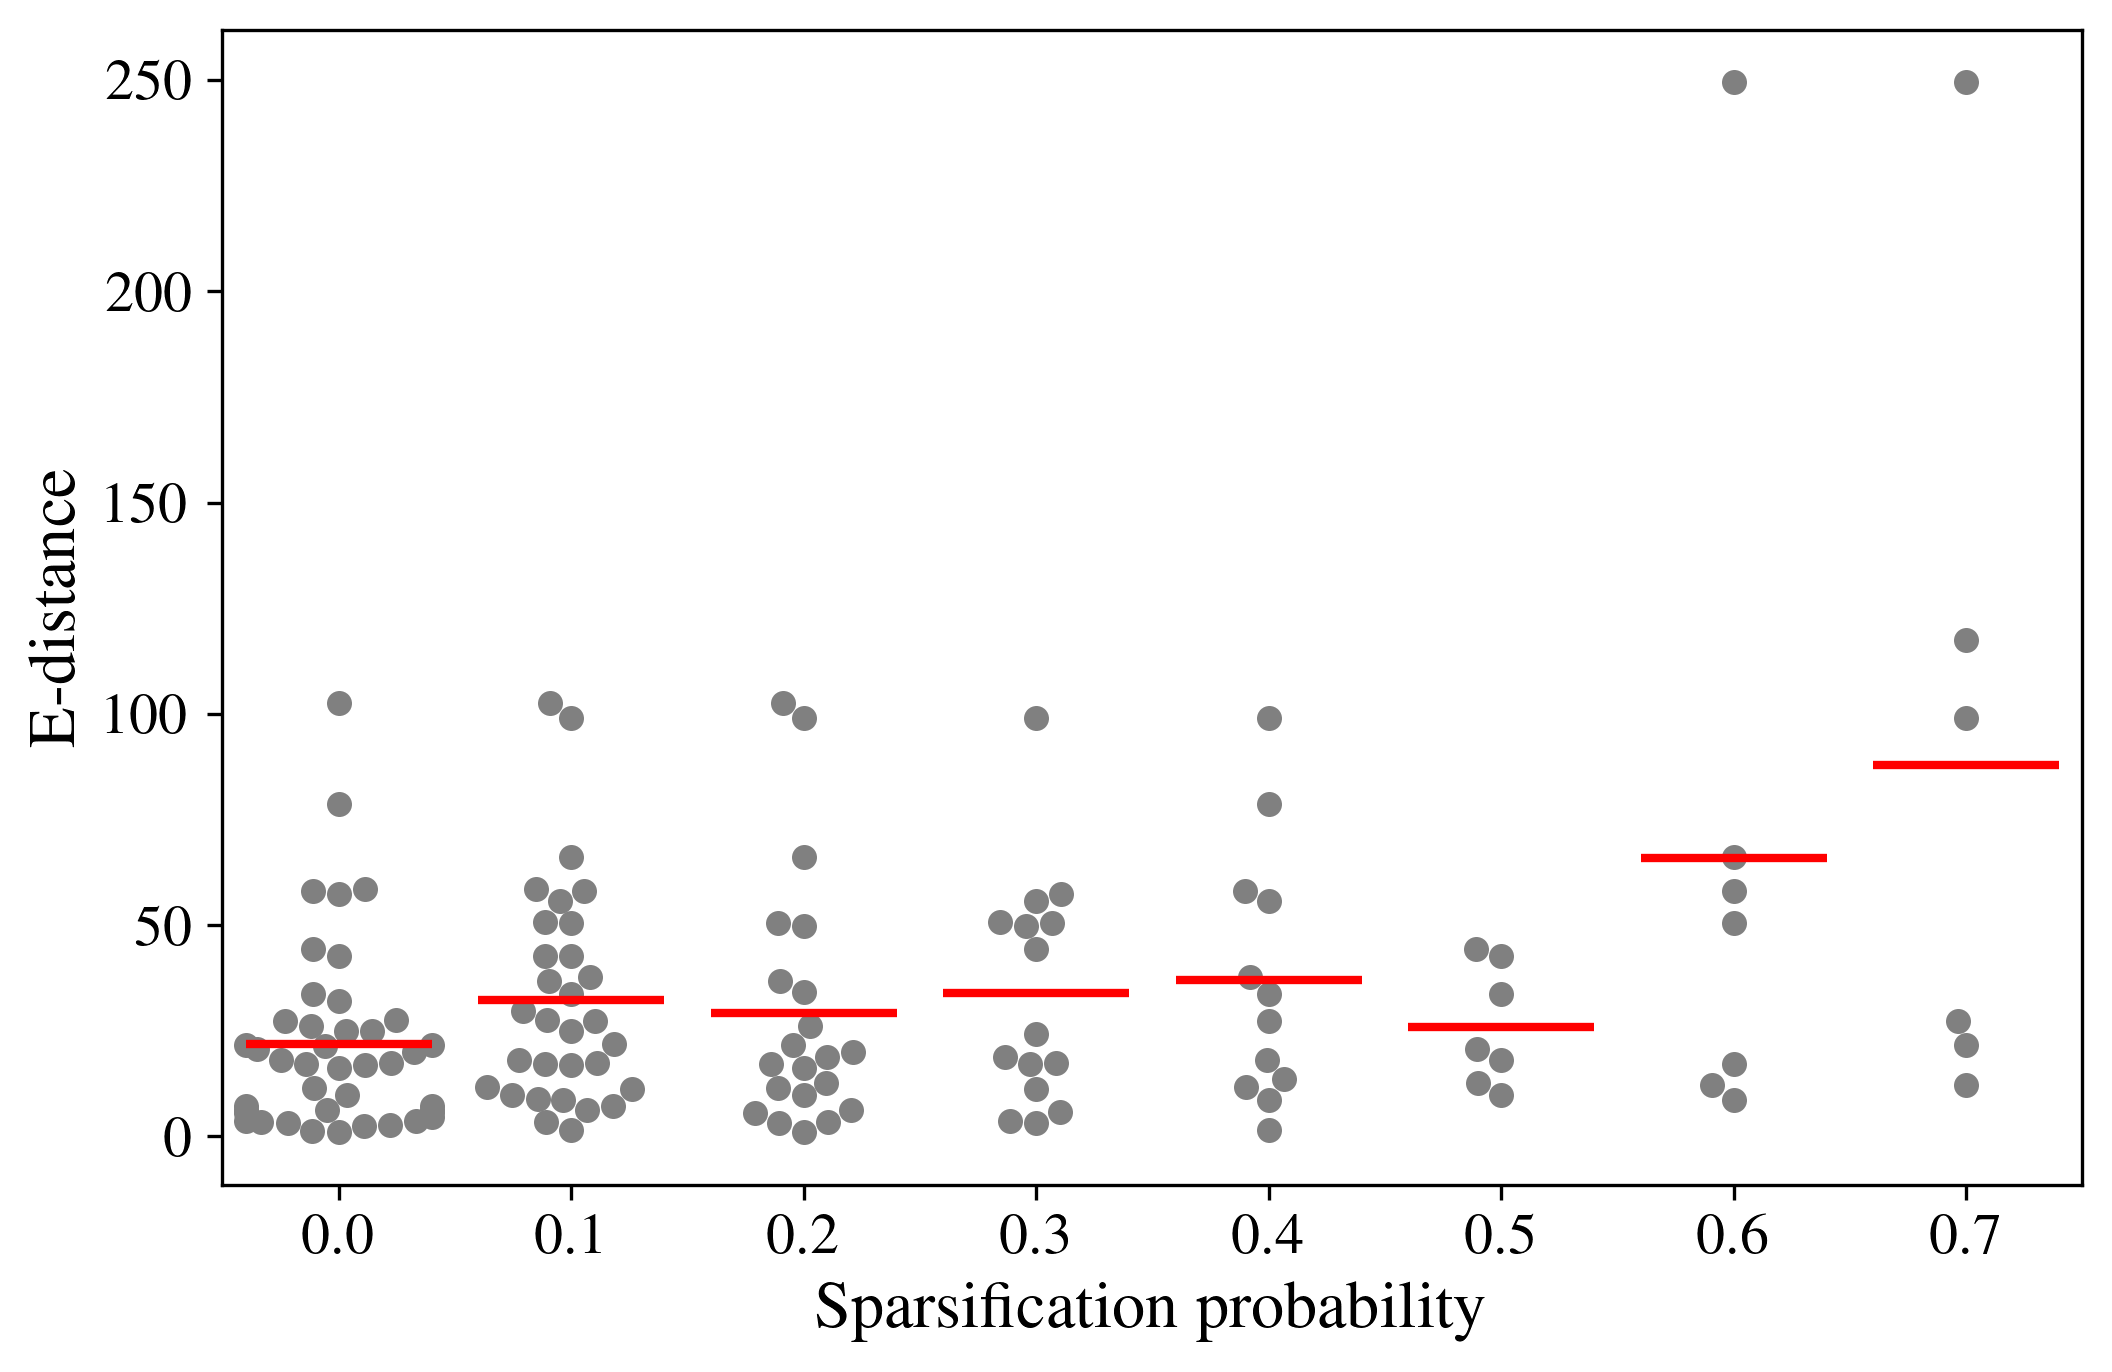

In [155]:
# Create the boxplot
plt.figure(figsize=(8, 5), dpi=300)
swarm = sns.swarmplot(x='data.split', y='edist', data=merged_df, s=6, color='grey')
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'red', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="data.split",
            y="edist",
            data=merged_df,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=swarm)

# Set the labels and title
plt.xlabel('Sparsification probability', fontsize=16)
plt.ylabel('E-distance', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14) 

# Show the plot
plt.savefig('paper_figs/edist_swarmplot.pdf')

In [10]:
def identify_outliers(df, column, threshold=2):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [11]:
from scipy.stats import linregress

# Function to add linear regression line and R^2 annotation
def add_regression_line_and_r2(ax, x, y):
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept

    # Plot regression line
    ax.plot(x, line, color='grey', zorder=1)

    # Annotate R^2 value
    ax.annotate(f'$R^2$ = {r_value**2:.2f}', xy=(0.85, 0.65), xycoords='axes fraction',
                fontsize=12, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

In [15]:
outliers_mse = identify_outliers(merged_df, 'average_test_mse')
outliers_edist = identify_outliers(merged_df, 'edist')
outliers = pd.concat([outliers_mse, outliers_edist])
outliers

,perturbation,edist,pvalue,significant,pvalue_adj,significant_adj,data.split,average_test_mse
18,CEBPE,98.999415,0.0001,True,0.008464,True,0.7,1.119834
64,IKZF3,117.367956,0.0001,True,0.008464,True,0.7,0.829192
10,CEBPA,249.466217,0.0001,True,0.008464,True,0.6,0.340392
11,CEBPA,249.466217,0.0001,True,0.008464,True,0.7,0.473248
64,IKZF3,117.367956,0.0001,True,0.008464,True,0.7,0.829192


In [13]:
from sklearn.cluster import DBSCAN

def annotate_clusters(df, eps=0.1, min_samples=1):
    # Extract coordinates
    coords = df[['edist', 'test/mse']].values

    # Perform DBSCAN clustering
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(coords)
    df['cluster'] = clustering.labels_

    # Annotate one point per cluster
    for cluster in df['cluster'].unique():
        cluster_points = df[df['cluster'] == cluster]
        if not cluster_points.empty:
            representative_point = cluster_points.iloc[0]
            plt.annotate(representative_point['perturbation'], 
                         (representative_point['edist'], representative_point['test/mse']),
                         textcoords="offset points", xytext=(0, 5), ha='center', fontsize=5,
                         color='black')

In [14]:
plt.figure(figsize=(8, 5), dpi=300)

data_splits = [
    (merged_df[merged_df['data.split'] == 0.0], '0.0'),
    (merged_df[merged_df['data.split'] == 0.1], '0.1'),
    (merged_df[merged_df['data.split'] == 0.2], '0.2'),
    (merged_df[merged_df['data.split'] == 0.3], '0.3'),
    (merged_df[merged_df['data.split'] == 0.4], '0.4'),
    (merged_df[merged_df['data.split'] == 0.5], '0.5'),
    (merged_df[merged_df['data.split'] == 0.6], '0.6'),
    (merged_df[merged_df['data.split'] == 0.7], '0.7')
]

colors = ['#E0A19D', '#C2837D', '#C2695F', '#AB544F', '#AD4137', '#8F2E27', '#711912', '#38120D']

plt.xlabel('E-distance', fontsize=16)
plt.ylabel('MSE', fontsize=16)
# plt.title('scFMs Test MSE vs E-distance')
plt.grid(True)
plt.ylim(0, 1.2)

if not outliers.empty: 
    for _, row in outliers.iterrows(): 
        plt.annotate(row['perturbation'], (row['edist'], row['average_test_mse']), textcoords="offset points", xytext=(-24, -4.2), ha='center', fontsize=12, color='black')
            
    for _, row in merged_df[merged_df['average_test_mse'] < 0.3].iterrows():
        if row['perturbation'] == 'AHR': 
            plt.annotate(row['perturbation'], (row['edist'], row['average_test_mse']), textcoords="offset points", xytext=(18, -4.2), ha='center', fontsize=12, color='black')
        
else: 
    for _, row in merged_df_scfm.iterrows(): 
        if row['perturbation'] != 'IKZF3': plt.annotate(row['perturbation'], (row['edist'], row['average_test_mse']), textcoords="offset points", xytext=(5, 0), ha='center', fontsize=12, color='black')
        
for (df, label), color in zip(data_splits, colors):
    plt.scatter(df['edist'], df['average_test_mse'], color=color, label=f'Split {label}', zorder=2)
    
# add_regression_line_and_r2(plt.gca(), merged_df['edist'], merged_df['average_test_mse'])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=10)
plt.savefig('paper_figs/scfm_mse_vs_edist.pdf')
plt.clf()

<Figure size 2400x1500 with 0 Axes>

In [12]:
import scanpy as sc
import matplotlib.pyplot as plt

# Load the .h5ad file
adata = sc.read("../data/norman_2019_raw.h5ad")

In [13]:
# change adata.obs['guide_ids'] to adata.obs['perturbation']
adata.obs['perturbation'] = adata.obs['guide_ids']
adata.obs = adata.obs.drop(columns=['guide_ids'])

In [14]:
# name every '' column to 'ctrl' 
adata.obs['perturbation'] = adata.obs['perturbation'].replace('', 'ctrl')

/var/folders/km/jgnm5nbx7tg_j37y7_0657q00000gn/T/ipykernel_60904/1610021118.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['perturbation'] = adata.obs['perturbation'].replace('', 'ctrl')


## Generate UMAPs

In [15]:
# only keep 'IKZF3' and 'ctrl' perturbations
adata_test = adata[adata.obs['perturbation'].isin(['SPI1', 'ctrl'])]

In [16]:
def create_umap(data, pert_name):
    plt.rcParams['figure.dpi'] = 300    
    data = data[data.obs['perturbation'].isin([pert_name, 'ctrl'])]
    sc.pp.normalize_total(data)
    sc.pp.log1p(data)
    sc.pp.highly_variable_genes(data, n_top_genes=2000)
    data = data[:, data.var.highly_variable]
    
    # Perform PCA
    sc.tl.pca(data, n_comps=50)
    
    # Compute the neighborhood graph
    sc.pp.neighbors(data, n_neighbors=15, n_pcs=50)
    
    # Compute UMAP
    sc.tl.umap(data)
    
    # Plot UMAP
    sc.pl.umap(data, color='perturbation', save=f'_{pert_name}.pdf')